# Introduction


There are many Python libraries used for data visualization such as *Plotly* a Python graphing library that enables the creation of interactive, web-based visualizations, *Seaborn* a statistical data visualization library based on Matplotlib, *bokeh* a Python interactive visualization library that targets modern web browsers, providing elegant and interactive data visualizations for the web and more. However, *Matplotlib* provides a wide range of functionalities for creating various types of plots with a diverse set of plot types and offers extensive customization options. Matplotlib also has a large and active community and it is compatible with multiple operating systems, making it easy to create consistent visualizations across different platforms. For these reasons, we will use Matplotlib for visualizing seismological data. 


# Basic Structure

The main structure of Matplotlib consists of the `Figure` and the `Axes` containers. `Figure` is the main, top-level area of the graph and it contains one or more `Axes` objects. `Axes` refers to an individual plot or chart inside the main `Figure` that hosts the actual plot or visualization. It is the area where data is visualized, including the coordinate system, data points, labels, and other plot elements. Note that Axis refers to the cartesian axis and `Axes` is the Matplotlib plot area. When you create multiple `Axes` objects arranged in a grid (rows and columns), they are often referred to as subplots. A standard use is to create a `Figure` instance and one or more `Axes` plots inside the `Figure`. There are many ways to achieve that however, to keep things simple, we will use the matplotlib.pyplot.subplots function. It creates a `Figure` and a set of subplot objects. It provides a convenient way to create a grid of `Axes` or subplots in a single call.


Start by importing the libraries that we will use throughout the tutorial:

In [2]:
from obspy.core import read
import matplotlib.pyplot as plt
import pandas as pd

Initialize a `Figure` container with a single `Axes` graph inside it:

If you don't define any parameters in the subplots function, it is assumed one row and one column in the grid, that means one `Axes` object (`nrows=1` and `ncols=1`): 

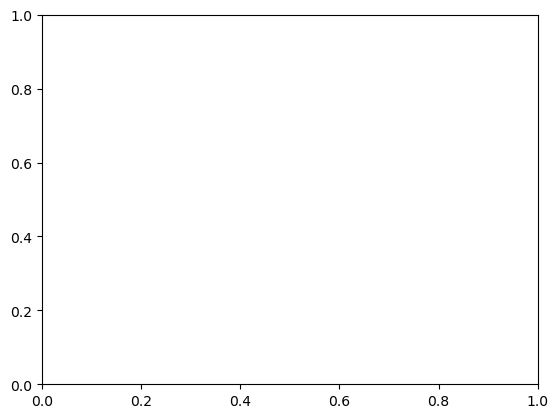

In [3]:
# initialize the figure and a single axes object
fig, ax = plt.subplots()

In case you need to plot multiple plots in a grid, manipulate the `nrows` and `ncols` parameters of the subplots function. Let's build a `Figure` container with a grid, of two rows and three columns, that is in total six subplots: 


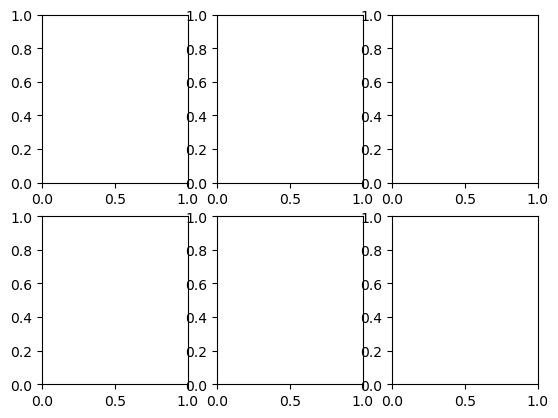

In [4]:
# create a figure with 2 rows and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=3) 

Apparently, the plots are overlapping between each other. There are various ways to solve this problem. One of them includes the use of the `plt.tight_layout()` function to automatically adjust subplot parameters. This ensures that the specified subplots fit within the figure area without overlapping. Another way is to just set `layout="constrained"` in the subplots function: 


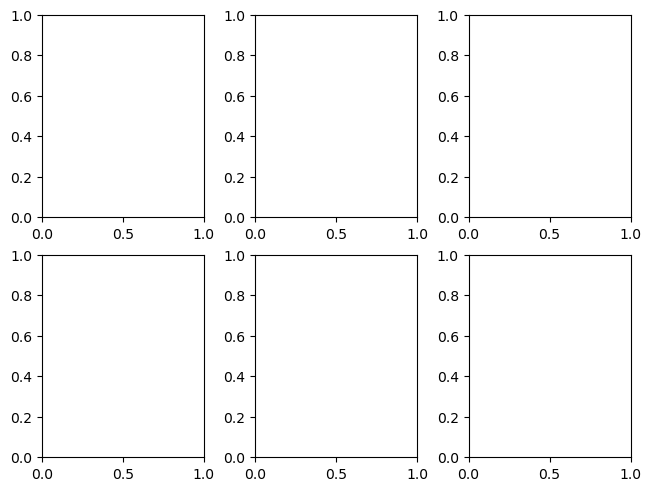

In [5]:
# adjust plots to not overlap
fig, ax = plt.subplots(nrows=2, ncols=3, layout="constrained")  

The return value of the subplots function that we used earlier, is a tuple of a `Figure` instance as the first element and a single `Axes` (in case of `nrows=1, ncols=1`) or an array of `Axes` objects as the second element of the tuple. In case of multiple `Axes` objects, use the Python list indexing (subscripting) operator to refer to a specific subplot. For instance, in case of 1D array of subplots (e.g., `nrows=1, ncols=5 or nrows=4, ncols=1`) use the `ax[n]` operator to get the nth subplot in the array. If you have a 2D array of subplots (e.g., `nrows=2, ncols=5`) use the indexing operator two times to specify first the row and second the column of the subplot that you want to get (e.g., `ax[0,2]`). Remember, in Python everything starts from 0. The naming of the subplots return value does not matter. You can use "axes" instead of "ax" if it seems more straightforward (e.g., `fig, axes = plt.subplots()`).


Matplotlib `Axes` object contains several special methods that create various graphics or primitives inside of it. Such methods are the `plot()` method that creates a line graphic (`Line2D`), the `text()` method that generates a Text instance, the `legend()` method that creates a Legend object etc. There are many more interesting things in the documentation but it is way better to learn about the library while plotting real seismological data. Consider reading the documentation for more information. 


# Basic graph styling

In this section, we'll explore fundamental styling techniques to enhance the visual appeal of the plot and include essential information to the graph area. This includes tasks like setting the graph title, adding titles to the x and y axis, adjusting the grid and legend, and styling the line objects within the graph. 


## Import And Plot The Data

Start by reading a file containing the Fourier Spectra of a record using Python Pandas: 

In [6]:
df = pd.read_csv('1_fourier-spectra_data.txt', sep="\s+")
print(df)

FileNotFoundError: [Errno 2] No such file or directory: '1_fourier-spectra_data.txt'

Plot the Fourier Spectra of the E component of the record

In [ ]:
# initialize a figure and axes objects
fig, ax = plt.subplots()

# plot the data
ax.plot(df['freq'], df['E-signal'])

![Fourier Spectra of the record](images/fourier_data_plot.png)

## Style Graph And Axis Titles

Start by inserting a title for the graph and labels for the graph axis:

In [ ]:
# add an Axes title with some styling
ax.set_title("Fourier Spectra Values", size=22, color="navy", pad=15)

# add labels for the X and Y axis with some styling
ax.set_xlabel("Frequency [Hz]", size=14, style="italic")
ax.set_ylabel("Magnitude", size=14, style="italic")

fig

![Edit title and axis labels](images/fourier_data_plot_labels.png)

Utilize various parameters to control the style of the labels such as color for the color, size for the size of the corresponding label, pad for the distance of the label from the graph and more. There are more text properties at the documentation. 

## Configure Grid And Ticks

At this point we are going to configure the x and y axis ticks, which are the numbers and the lines that show the data labels. Matplotlib contains the `tick_params` function to change the appearance of ticks, tick labels and grid. In addition, utilize the Matplotlib `grid` function to style the grid of the graph: 

In [ ]:
# edit axis ticks and grid
ax.tick_params(axis='both', which='both', direction='in', length=4, width=1, colors='black')

# set axis scale to log
ax.set_xscale("log")
ax.set_yscale("log")

# style the grid
ax.grid(True, linestyle='-', alpha=0.1, color="grey", which="both", lw=2)
fig

![Edit axis ticks and grid style](images/fourier_data_plot_grid_ticks.png)

Since the Fourier Spectra data is usually plotted with "log" scale we use the Matplotlib `set_xscale` and `set_yscale` functions to set the scale of the x and y axis respectively. Then, we utilize the tick_params function to configure the tick lines and labels. There are various other parameters that you can control, presented at the documentation. Activate the grid using the Matplotlib grid function and configure its color, width and opacity (alpha).

## Configure The Legend

The last styling to apply is on the legend of the graph. Legend is one of the most important graph characteristics, since it provides information about the graph content. Assume that the record that generated the Fourier Spectra happened on 14 of July, 2014 at 14:08:05 and was recorded by station *CHN1*. To add the legend, we need to re-plot the data and add a label parameter at the `plot()` function. 

In [ ]:
# initialize a figure and axes objects
fig, ax = plt.subplots()

# plot the data
ax.plot(df['freq'], df['E-signal'], label="E-component")

# insert graph title and axis labels
ax.set_title("Fourier Spectra Values", size=22, color="navy", pad=15)
ax.set_xlabel("Frequency [Hz]", size=14, style='italic')
ax.set_ylabel("Magnitude", size=14, style='italic')

# edit axis ticks
ax.tick_params(axis='both', which='both', direction='in', length=4, width=1, colors='black')

# edit x and y scale
ax.set_xscale("log")
ax.set_yscale("log")

# style the grid
ax.grid(True, linestyle='-', alpha=0.1, color="grey", which="both", lw=2)

# style the legend
ax.legend(title="2014-07-14 14:08:05 CHN1", loc="upper right", framealpha=0.1, shadow=True)

![style the legend of the graph](images/fourier_data_plot_legend.png)

There are many ways to add a legend in a graph. However, the recommend way is to add the label parameter at the plot function. That way, matplotlib knows which item on the graph to refer to. There are a number of parameters to control the appearance of the legend. For instance, use the `loc` parameter to position the legend, the framealpha parameter to control the opacity of the legend, title to add a title to the legend etc. 

## Configure The Line

Last, it is of great importance the styling of the line in a graph (the Fourier Spectra line in the previous graphs). The configuration of the line is similar to the parameters used to edit the grid of the graph. Some of the characteristics that we can use to configure the line are:

- *linewidth* or *lw*, sets the width of the line
- *linestyle* or *ls*, styles the line (line styles)
- *color*, that controls the color of the line (named colors)
- *marker*, that sets the style of the marker (marker styles)
- *markerfacecolor* or *mfc*, sets the fill color of the marker
- *markeredgecolor* or *mec*, sets the color of the edge of the marker
- *markersize* or *ms*, sets the size of the marker

There are many other parameters that control the appearance of the line at the documentation. 

# Plot Seismic Records

At this point, we will plot real seismological data. We will start by reading data from a MiniSEED file. A MiniSEED file is a binary file used to store time series data in a compact and efficient format that includes information about the station, location, timing, and the actual waveform data. We will use Python ObsPy read function to read the file into an ObsPy `Stream` object. The `Stream` object in ObsPy is essentially a collection of multiple `Trace` objects. Each `Trace` object represents a single continuous time series of seismic data, and a `Stream` can contain multiple traces that are related, such as different components of the same seismic station or data from different stations. Check the ObsPy tutorial for more information.

Read a seismic record that took place in 24 of July, 2015 at the *KRL1* station, into a `Stream` object:

In [ ]:
# read the recording
st = read("20150724_095834_KRL1.mseed")
print(st)

This `Stream` object contains 3 traces or single time series with different components (E, N, Z). To plot the data, start by looping through the traces contained inside the `Stream` object. Use the `.data` attribute of each `Trace` object to get the data values and the `.times()` method to get the time from zero till the total record duration length: 

In [ ]:
# create a matplotlib Figure and three Axes vertically since we have three components
fig, ax = plt.subplots(nrows=3, ncols=1)

# loop through each trace inside the stream object (use the Python "len" function to get the total traces)
for i in range(len(st)):
    # get the current trace using a simple Python indexing operation
    curr_tr = st[i]

    # get the current Axes again using a simple Python indexing operation
    curr_ax = ax[i]

    # get the component of the current trace using the .stats["channel"] method
    curr_compo = curr_tr.stats["channel"]

    # get the time series data values
    ydata = curr_tr.data

    # get the time values
    xdata = curr_tr.times()

    # plot the current trace at the respective Axes with some styling
    curr_ax.plot(xdata, ydata, color="navy", lw=1, label=curr_compo)

    # add the legend at the top right corner of the graph
    curr_ax.legend(loc="upper right")

# fix the overlapping graphs
plt.tight_layout()

# set the title of the figure by setting the title of the first Axes
ax[0].set_title("20150724_095834_KRL1", size=12, pad=15)

![Time series of the recording happened on 24 of July, 2015 at the KRL1 station](images/matplotlib_mseed_plot.png)

There is more functionality at the Python ObsPy library, to process seismic data. Check the ObsPy tutorial. In addition, we could apply more styling to the seismograms, however i leave it up to you to explore the Matplotlib library. Bear in mind that you need to keep it simple and not to add a lot of information at the graph. 

# Miscellaneous Functions

Matplotlib contains a variety of different kind of plots and functions to try. Some of them are very useful into the world of Seismology.

For instance the Matplotlib `axhline` and `axvline` are used to draw a horizontal and vertical line across the axes respectively. You can style this line just like you style the plotted line we saw at the previous chapters. 

![matplotlib ax h and ax v line function](images/arrivals.png)

In addition, Matplotlib functions `fill_between` and `fill_betweenx` are used to fill the area between two horizontal or vertical curves respectively. It is often used to highlight regions of interest in a plot or to visually emphasize the difference between two datasets. 

![matplotlib fill between x function](images/windows.png)

To continue, Matplotlib `subplot_mosaic` is a function to create a complex grid of `Axes` objects with different sizes that extend to more than one row or columns. 

![matplotlib subplot mosaic function](images/subplot_mosaic.png)

Lastly, other useful functions that may come handy are the Matplotlib `ax.set_xlim()` and `ax.set_ylim()` that set the axis x and y limits, the `ax.text()` function that generates a text at a specific position at the graph, the `ax.annotate()` function that creates a box with a text and optionally an arrow that points to a specific location on the graph, `ax.scatter()` that creates a scatter plot and more.